# Observations for the night September 09th 2021 : Use QuickLookExp


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/09/10
- update : 2021/09/17 : Work with Ronchi


In [17]:
#! eups list -s

In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [19]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [20]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [21]:
FLAG_SAVE_IMAGE=True

In [22]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [23]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  Fossil   _parent.old  rerun
CALIB_OLD  calibrations  dagoret    _parent  ref_cats


In [24]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 icExp
drwxrwsrwx  7 49813 1363  4096 Jul  7 01:31 icSrc
drwxrwsrwx  4 49813 1363  4096 May 13 17:15 postISRCCD
drwxrwsrwx 69 49813 1363 32768 Sep 13 15:19 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16 20:28 repositoryCfg.yaml_backup
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 spectractorOutput


In [25]:
!ls /project/shared/auxTel/rerun/quickLook/quickLookExp

d2020-01-17  d2020-02-21  d2021-01-27  d2021-03-03  d2021-05-25  d2021-08-04
d2020-01-21  d2020-03-12  d2021-02-01  d2021-03-04  d2021-06-08  d2021-08-05
d2020-01-22  d2020-03-13  d2021-02-02  d2021-03-05  d2021-06-09  d2021-08-17
d2020-01-23  d2020-03-14  d2021-02-04  d2021-03-08  d2021-06-10  d2021-09-03
d2020-01-27  d2020-03-15  d2021-02-09  d2021-03-09  d2021-07-07  d2021-09-07
d2020-01-28  d2020-03-16  d2021-02-10  d2021-03-10  d2021-07-08  d2021-09-08
d2020-01-29  d2020-10-30  d2021-02-11  d2021-03-11  d2021-07-12  d2021-09-09
d2020-02-12  d2021-01-15  d2021-02-12  d2021-03-18  d2021-07-13
d2020-02-17  d2021-01-19  d2021-02-15  d2021-03-22  d2021-07-16
d2020-02-18  d2021-01-20  d2021-02-16  d2021-03-23  d2021-07-20
d2020-02-19  d2021-01-21  d2021-02-17  d2021-04-08  d2021-07-27
d2020-02-20  d2021-01-26  d2021-02-18  d2021-04-14  d2021-07-28


In [26]:
!ls /project/shared/auxTel/rerun/quickLook/quickLookExp/d2021-09-09 -l

total 84384896
-rw-r--r-- 1 49813 1363 108509760 Sep 13 17:17 quickLookExp-d2021-09-09-s00001.fits
-rw-r--r-- 1 49813 1363 108495360 Sep 13 17:17 quickLookExp-d2021-09-09-s00002.fits
-rw-r--r-- 1 49813 1363 108504000 Sep 13 17:17 quickLookExp-d2021-09-09-s00003.fits
-rw-r--r-- 1 49813 1363 108489600 Sep 13 17:16 quickLookExp-d2021-09-09-s00004.fits
-rw-r--r-- 1 49813 1363 108483840 Sep 13 17:16 quickLookExp-d2021-09-09-s00005.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:16 quickLookExp-d2021-09-09-s00006.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:16 quickLookExp-d2021-09-09-s00007.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:16 quickLookExp-d2021-09-09-s00008.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:16 quickLookExp-d2021-09-09-s00009.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:16 quickLookExp-d2021-09-09-s00010.fits
-rw-r--r-- 1 49813 1363 108486720 Sep 13 17:15 quickLookExp-d2021-09-09-s00011.fits
-rw-r--r-- 1 49813 1363 108489600 Sep 13 17:15 quickLookExp-d

# Configuration

## Location and date

In [27]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-09-09"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 817


# Selection of dispersers

In [28]:
#DISPERSER_SEL="holo4_003"
DISPERSER_SEL="ronchi170lpmm"

# Information from reporter

In [29]:
print(reporter.getObservedObjects())

['AT_TEST_SURVEY_TILE_0113', 'AT_TEST_SURVEY_TILE_0069', 'HD 2811', 'AT_TEST_SURVEY_TILE_0058', 'AT_TEST_SURVEY_TILE_0063', 'caltest41', 'AT_TEST_SURVEY_TILE_0086', 'slew_icrs', 'AT_TEST_SURVEY_TILE_0048', 'AT_TEST_SURVEY_TILE_0094', 'AT_TEST_SURVEY_TILE_0031', 'AT_TEST_SURVEY_TILE_0091', 'HR 807', 'AT_TEST_SURVEY_TILE_0057', 'AT_TEST_SURVEY_TILE_0085', 'AT_TEST_SURVEY_TILE_0054', 'AT_TEST_SURVEY_TILE_0013', 'AT_TEST_SURVEY_TILE_0097', 'caltest33', 'AT_TEST_SURVEY_TILE_0073', 'caltest81', 'caltest29', 'AT_TEST_SURVEY_TILE_0082', 'caltest72', 'AT_TEST_SURVEY_TILE_0029', 'AT_TEST_SURVEY_TILE_0076', 'PNG321.0+03.9', 'AT_TEST_SURVEY_TILE_0114', 'caltest32', 'HD 185975', 'AT_TEST_SURVEY_TILE_0108', 'AT_TEST_SURVEY_TILE_0043', 'AT_TEST_SURVEY_TILE_0100', 'AT_TEST_SURVEY_TILE_0070', 'AT_TEST_SURVEY_TILE_0080', 'caltest38', 'AT_TEST_SURVEY_TILE_0028', 'AT_TEST_SURVEY_TILE_0022', 'caltest51', 'caltest70', 'HD 031128', 'AT_TEST_SURVEY_TILE_0055', 'AT_TEST_SURVEY_TILE_0044', 'caltest67', 'HD 2090

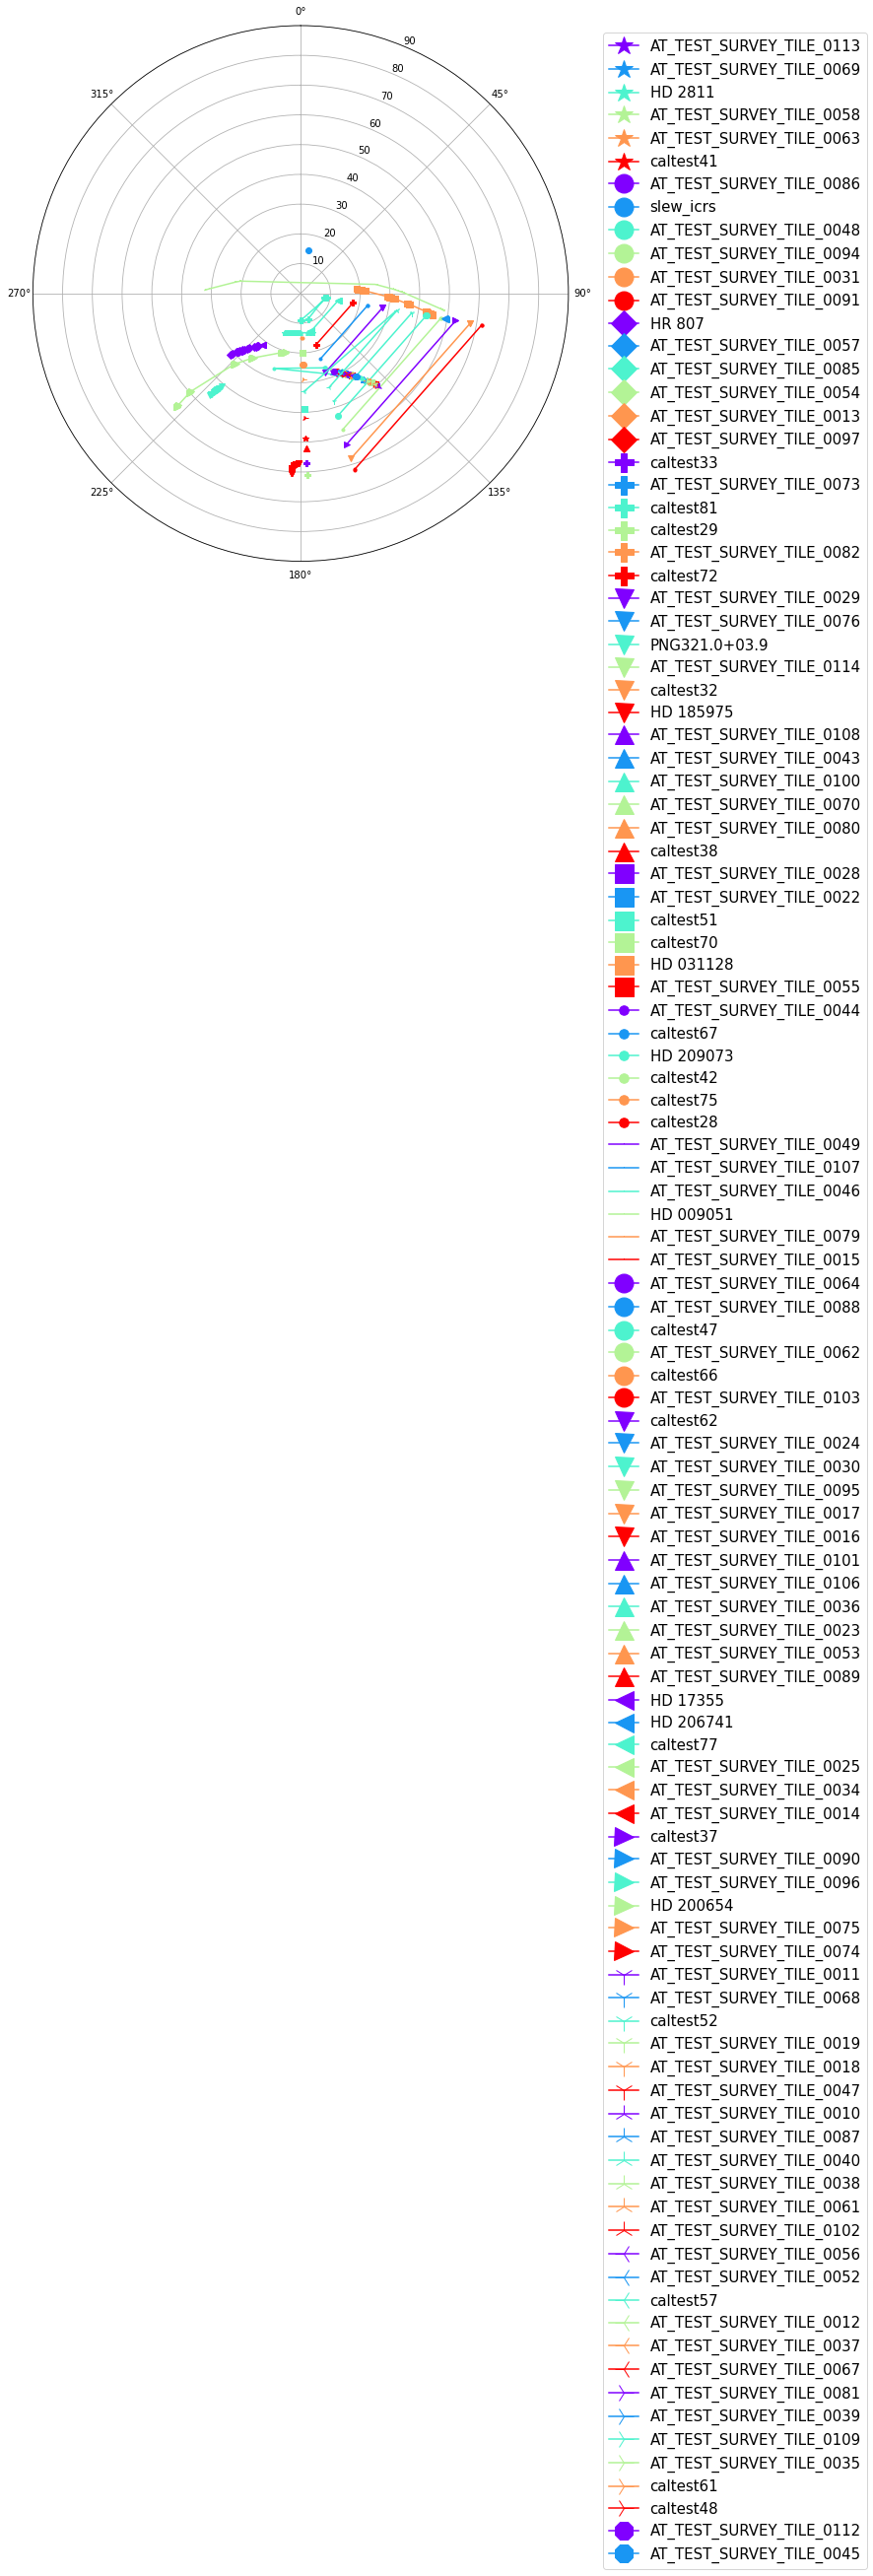

In [30]:
reporter.makePolarPlotForObjects()

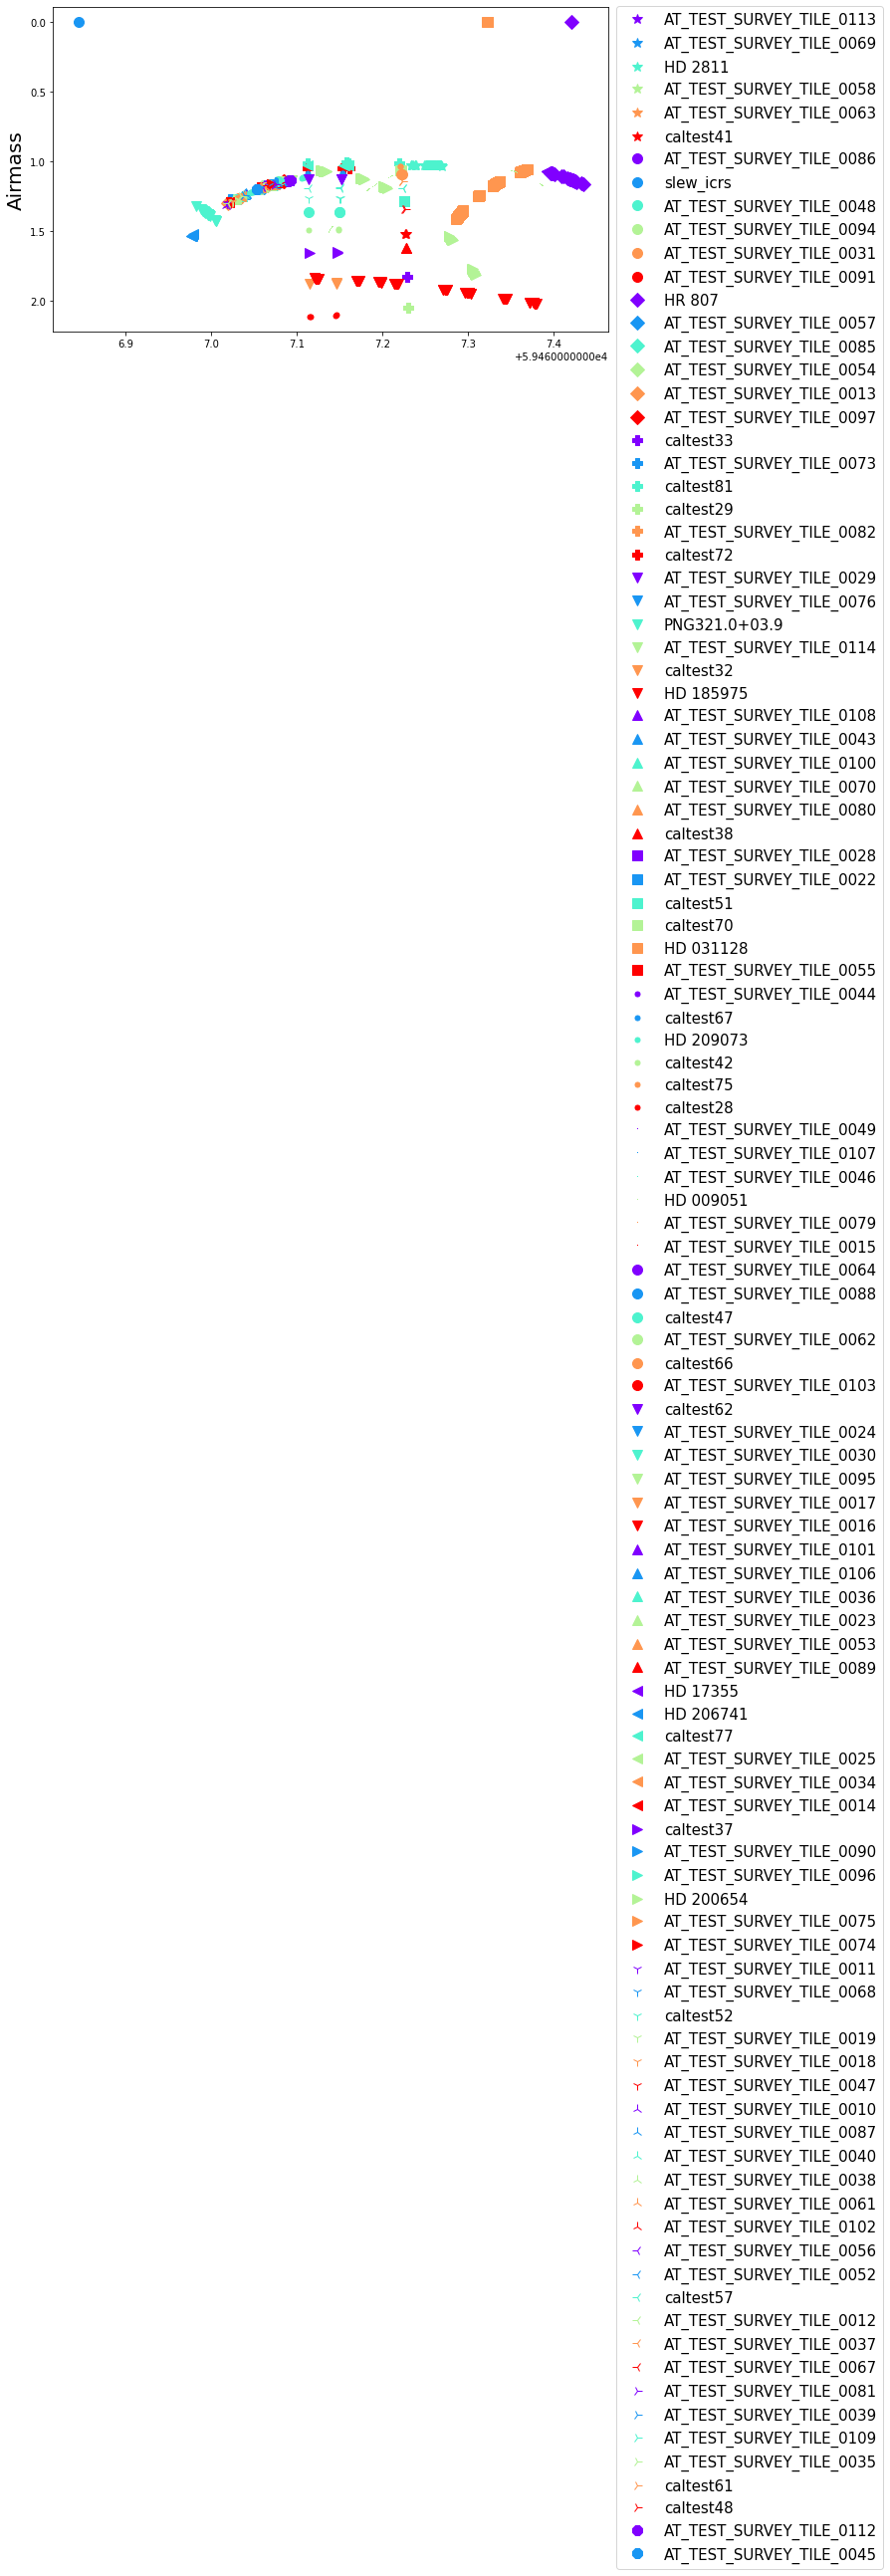

In [31]:
reporter.plotPerObjectAirMass()

In [32]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      Park position 19:56:17.928 FELH0600~holo4_003           0.0  0.00
   2 bias      Park position 19:58:36.831 FELH0600~holo4_003         138.9  0.00
   3 engtest   slew_icrs  20:15:51.404 FELH0600~holo4_003        1034.6  2.00
   4 bias      FlatField position 20:34:33.961 FELH0600~holo4_003        1122.6  0.00
   5 bias      FlatField position 20:34:38.466 FELH0600~holo4_003           4.5  0.00
   6 bias      FlatField position 20:34:42.979 FELH0600~holo4_003           4.5  0.00
   7 bias      FlatField position 20:34:47.505 FELH0600~holo4_003           4.5  0.00
   8 bias      FlatField position 20:34:52.012 FELH0600~holo4_003           4.5  0.00
   9 bias      FlatField position 20:34:56.558 FELH0600~holo4_003           4.5  0.00
  10 bias      FlatField position 20:35:01.057 FELH0600~holo4_003           4.5  0.00
  11 bias      FlatField position 20:35:05.563 FELH0600~holo4_003           4.5  0.

# Butler

## Configuration for Butler

In [33]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

- Hologram
-- PN : Series 1 : 165-177
-- HD 2811 : Series 2 : 567 599
- Ronchi:
-- PN : Series 3 : 156-164

In [34]:
# Series 1 :  PN with hologram
#all_myseq_holo=range(165,178)

#all_myseq_holo=range(165,172)
#all_myseq_holo=range(174,178)

# Series 2 : HD 2811 with hologram
all_myseq_holo=range(567,600)


# Series 3 : PN with Ronchi
all_myseq_ronchi=range(156,165)

#all_myseq=all_myseq_holo
all_myseq=all_myseq_ronchi

In [35]:
seqNum=all_myseq[0]

In [36]:
seqNum

156

## Display

In [37]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_09_09',url=os.environ["FIREFLY_URL"])

In [38]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [39]:
# and this command show the image
display1.mtv(raw)

In [40]:
display1.getClient().display_url()

## Access to image sequence

In [41]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 8, 7, 5, 6, 13, 10, 12, 9, 11, 16, 19, 18, 17, 14, 15, 20, 21, 22, 24, 26, 25, 23, 30, 33, 32, 27, 31, 29, 28, 34, 39, 38, 37, 36, 35, 43, 46, 44, 42, 45, 41, 40, 53, 47, 50, 52, 48, 51, 49, 54, 55, 57, 56, 59, 58, 60, 62, 61, 63, 64, 65, 66, 67, 68, 69, 72, 71, 74, 70, 73, 75, 76, 78, 77, 79, 85, 82, 80, 84, 81, 83, 86, 87, 89, 88, 92, 91, 90, 93, 94, 97, 98, 99, 96, 95, 103, 101, 102, 100, 104, 107, 106, 105, 108, 109, 111, 110, 112, 114, 113, 115, 117, 116, 118, 119, 120, 121, 122, 123, 125, 128, 126, 127, 124, 129, 135, 133, 136, 130, 131, 132, 134, 137, 138, 140, 139, 141, 144, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [42]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000156: 'MJD-OBS not found'


In [43]:
exp_image=exp.image.array

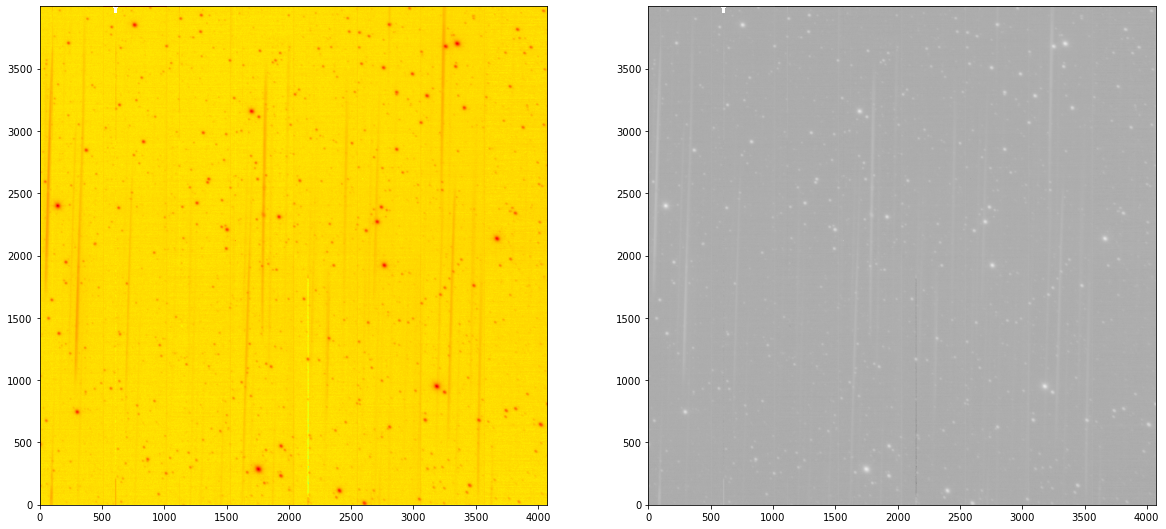

In [44]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(exp_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(exp_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [45]:
type(exp_image)

numpy.ndarray

In [46]:
exp_image.shape

(4000, 4072)

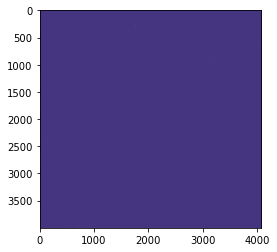

In [47]:
plt.imshow(exp_image)

## Meta Data

In [48]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [49]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
del md['HASTART']
md['HA'] = ha

In [50]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-09-09T23:45:14.656',
 'DATE-OBS': '2021-09-09T23:45:38.781',
 'DATE-BEG': '2021-09-09T23:45:38.781',
 'DATE-END': '2021-09-09T23:45:49.016',
 'MJD': 59466.9897529628,
 'MJD-OBS': 59466.9900321874,
 'MJD-BEG': 59466.9900321874,
 'MJD-END': 59466.9901506528,
 'OBSID': 'AT_O_20210909_000156',
 'GROUPID': '2021-09-09T23:45:22.785',
 'IMGTYPE': 'OBJECT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBS-LONG': -70.749417,
 'OBS-LAT': -30.244639,
 'OBS-ELEV': 2663.0,
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 224.970833333333,
 'DEC': -54.3019444444444,
 'RASTART': 224.948009772179,
 'DECSTART': -54.2637436603581,
 'RAEND': 224.947925229221,
 'DECEND': -54.2637407006469,
 'ROTPA': 208.60455718525,
 'ROTCOORD': 'sky',
 'ELSTART': 47.5492241068714,
 'AZSTART'

# Start

In [51]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [52]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_exp_array.append(np.copy(exp.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000156: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000157: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000158: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000159: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000160: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000161: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_000162: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210909_0001

In [53]:
#idx=0
#for exp_img in all_my_exp_array:
#    print(idx,"......" ,exp_img.shape)
#    idx+=1

## Total number of images

In [54]:
NSEL=len(all_my_exp_array)

In [55]:
NSEL

9

# Plot

In [56]:
idx=0

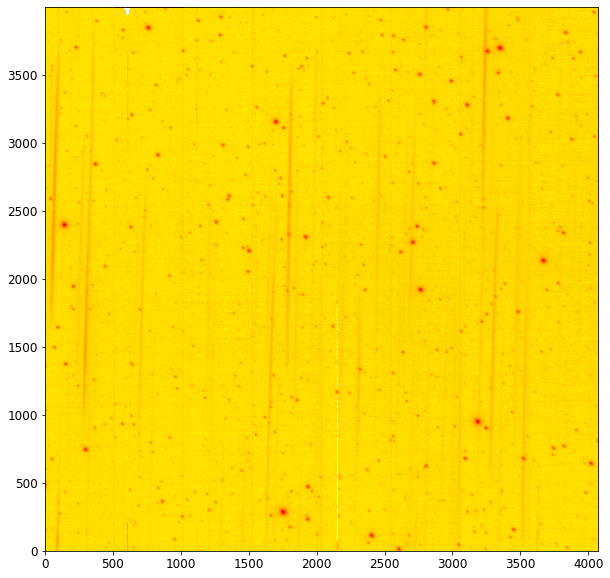

In [57]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

In [ ]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [ ]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [ ]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        